#Logistic regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backend_bases import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from IPython.core.debugger import set_trace
from google.colab import files    
import warnings
warnings.filterwarnings('ignore')

logistic = lambda z: 1./ (1 + np.exp(-z)) # Defining logistic function for later use

##Logistic regression data class

In [ ]:
class LogRegData:
    '''
    Logistic regression data class. The class loads the data, calculates the
    statistical summaries, and prints them. The split function splits the data
    into train-test parts based on a given ratio.
    
    pth: Path to the data location
    '''
    def __init__(self, pth):
        self.dat     = pd.read_csv(pth, delimiter=',', header=None)
        self.n       = self.dat.shape[0]
        self.x_train = None
        self.y_train = None
        self.x_test  = None     
        self.y_test  = None
             
    def stat_sum(self, prnt, save):
        #Provide statistical summary of the data
        
        stat_sum = pd.DataFrame(self.dat.describe(include='all'))
        cat_1 = (self.dat[0].value_counts()/self.n)#Categorical data
        cat_2 = (self.dat[1].value_counts()/self.n)
        cat_3 = (self.dat[2].value_counts()/self.n)
        cat_4 = (self.dat[3].value_counts()/self.n)
        cat_5 = (self.dat[4].value_counts()/self.n)
        cat_6 = (self.dat[5].value_counts()/self.n)
        all_cat = pd.concat([cat_1, cat_2, cat_3, cat_4, cat_5, cat_6], axis=1)
        all_cat.columns = ["Ind. Risk", "Man. Risk", "Fin. Flex.",
                    "Cred.", "Comp.", "Op. Risk"]
        results_dat = pd.concat([self.dat[6].value_counts()/self.n], axis=1)
        results_dat.columns = ["Class"]
      
        if prnt:
            print(stat_sum)
            print()
            print('Categorical data:')
            print(all_cat)
            print()
            print('Results data:')
            print(results_dat)
            print()
            print_bankruptcy_percentages()
        if save: 
            stat_sum.to_excel('statistical_summary.xlsx')
            all_cat.to_excel('categorical_statistical_summary.xlsx')
        
    def split(self, tst_ratio, rnd_stat=100):        
        # Split into train test sets. The outcomes are B (bankrupt) and NB
        # (non-bankrupt) in column 6 of the data.
        x_train, x_test, y_train, y_test = train_test_split(self.dat.iloc[:, 0:6],
                                                               self.dat.iloc[:, 6],
                                                               test_size=tst_ratio,
                                                               random_state=rnd_stat, 
                                                               stratify=self.dat.iloc[:, 6])
        self.x_train = x_train.values
        self.x_test  = x_test.values
        self.y_train = y_train.values
        self.y_test  = y_test.values


    def dum_coder(self, train, test, cat_dat=[0,1,2,3,4,5]): 
        '''
        Perform dummy one-hot encoding for the attribute info columns (x values)
        and separately the output column (y values)
        train: train set data
        test: test set data
        cat_dat: index of the categorical data columns in test and train sets
        '''
        train_matrix = np.zeros((train.shape[0],1))
        test_matrix= np.zeros((test.shape[0],1))

        enc = OneHotEncoder(drop="first", sparse=False)
        
        for cat in cat_dat:
            # One hot encoding the train and test sets
            # Must have condition because the y data is a 1D array
            if len(cat_dat) > 1: # AKA if we're one hot encoding the x data
              tmp_dat_trn = enc.fit_transform(train[:,cat].reshape(-1,1))
              tmp_dat_tst = enc.fit_transform(test[:,cat].reshape(-1,1))

            else: # AKA if we're one hot encoding the y data
              tmp_dat_trn = enc.fit_transform(train.reshape(-1,1))
              tmp_dat_tst = enc.fit_transform(test.reshape(-1,1))

            # Concatenating the previously-generated data into the corresponding zero matrix
            train_matrix = np.concatenate((train_matrix, tmp_dat_trn), axis=1)
            test_matrix = np.concatenate((test_matrix, tmp_dat_tst), axis=1)
            
        train=np.delete(train_matrix,0,1)
        test=np.delete(test_matrix,0,1)

        if len(cat_dat) > 1: # Dealing with x data
          self.dum_x_train = train
          self.dum_x_test = test
        else: # Dealing with y data
          self.dum_y_train = train
          self.dum_y_test = test

##Percent bankrupt info

In [ ]:
def print_bankruptcy_percentages():
    '''
    Helper function for stat_sum, prints the percentage of instances with banktrupcy who have the given ratings for each attribute
    '''
    print("Industrial Risk = P: " + str(len(rg_dat.dat[(rg_dat.dat[0] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Industrial Risk = A: " + str(len(rg_dat.dat[(rg_dat.dat[0] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Industrial Risk = N: " + str(len(rg_dat.dat[(rg_dat.dat[0] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

    print("Management Risk = P: " + str(len(rg_dat.dat[(rg_dat.dat[1] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Management Risk = A: " + str(len(rg_dat.dat[(rg_dat.dat[1] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Management Risk = N: " + str(len(rg_dat.dat[(rg_dat.dat[1] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

    print("Financial Flexibility = P: " + str(len(rg_dat.dat[(rg_dat.dat[2] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Financial Flexibility = A: " + str(len(rg_dat.dat[(rg_dat.dat[2] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Financial Flexibility = N: " + str(len(rg_dat.dat[(rg_dat.dat[2] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

    print("Credibility = P: " + str(len(rg_dat.dat[(rg_dat.dat[3] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Credibility = A: " + str(len(rg_dat.dat[(rg_dat.dat[3] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Credibility = N: " + str(len(rg_dat.dat[(rg_dat.dat[3] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

    print("Competitiveness = P: " + str(len(rg_dat.dat[(rg_dat.dat[4] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Competitiveness = A: " + str(len(rg_dat.dat[(rg_dat.dat[4] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Competitiveness = N: " + str(len(rg_dat.dat[(rg_dat.dat[4] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

    print("Operating Risk = P: " + str(len(rg_dat.dat[(rg_dat.dat[5] == 'P') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Operating Risk = A: " + str(len(rg_dat.dat[(rg_dat.dat[5] == 'A') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))
    print("Operating Risk = N: " + str(len(rg_dat.dat[(rg_dat.dat[5] == 'N') & (rg_dat.dat[6] == 'B')]) / len(rg_dat.dat[rg_dat.dat[6] == 'B'])))

##Uploading data file and showing summary

In [ ]:
# Need to upload the data into colab first
uploaded = files.upload()

pth = 'Qualitative_Bankruptcy.data.txt' # Path to load the data
rg_dat = LogRegData(pth) # Initializing the logistic regression data instance
rg_dat.stat_sum(prnt=True, save=False) #

Saving Qualitative_Bankruptcy.data.txt to Qualitative_Bankruptcy.data (5).txt
          0    1    2    3    4    5    6
count   250  250  250  250  250  250  250
unique    3    3    3    3    3    3    2
top       N    N    N    N    N    N   NB
freq     89  119  119   94  103  114  143

Categorical data:
   Ind. Risk  Man. Risk  Fin. Flex.  Cred.  Comp.  Op. Risk
N      0.356      0.476       0.476  0.376  0.412     0.456
A      0.324      0.276       0.296  0.308  0.224     0.228
P      0.320      0.248       0.228  0.316  0.364     0.316

Results data:
    Class
NB  0.572
B   0.428

Industrial Risk = P: 0.24299065420560748
Industrial Risk = A: 0.2616822429906542
Industrial Risk = N: 0.4953271028037383
Management Risk = P: 0.102803738317757
Management Risk = A: 0.21495327102803738
Management Risk = N: 0.6822429906542056
Financial Flexibility = P: 0.009345794392523364
Financial Flexibility = A: 0.037383177570093455
Financial Flexibility = N: 0.9532710280373832
Credibility = P: 0.02803

##Cost function

In [ ]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    #log1p calculates log(1+x) to remove floating point inaccuracies 
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
    return J

## Gradient function

In [ ]:
def gradient( x, y, w, alpha, beta):
    '''
    Function to calculate the gradient. 
    x: input features
    y: outcomes
    w: weights
    alpha: L2 regularization strength
    beta: L1 regularization strength    
    '''
    y_pred =  logistic(np.dot(x, w))
    dlt_y = y_pred - y
    N, _ = x.shape
    tmp_w = w.copy()  

    grad = (np.dot(x.T, dlt_y)/N)

    grad[:-1,:] += alpha * tmp_w[:-1,:].copy() # Beware of indexing. Using grd[:-1] will disrupt the shapes
    grad[:-1,:] += beta * np.sign(tmp_w[:-1,:])

    return grad

#Momentum function

In [ ]:
def momntm(grad, prev_mnt, mn_beta=0):
    '''
    Function to calculate the momentum 
    grad: current gradient
    prev_mnt: previous momentum
    mn_beta: momentum beta, momentum ineffective at 0
    '''
    mmnt = mn_beta * prev_mnt + (1-mn_beta) * grad
    return mmnt

#Logistic regression class

In [ ]:
class LogisticReg:
    '''
    Logistic regression class. The class is used to fit the data to a
    logistic regression model and predict the data.
    '''
    def __init__(self, add_bias=True, verbose=False):
        self.add_bias = add_bias
        self.verbose = verbose
        
    def fit(self, x, y, grad_desc, momentum=momntm):
        '''
        Function to fit a linear model
        x: input features
        y: outcomes
        grad_desc: Gradient Descent object
        momentum = momentum function  
        '''
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        g = np.inf 
        t = 0
        w = np.random.randn(D,1)

        # The code snippet below is for gradient descent
        self.w,self.temp_ls = grad_desc.run(gradient, momentum, x, y, w)
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {w}')
        return self
    
    def predict(self, x):
        '''
        Function to ?
        x: input features
        '''
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w)) # Predict output
        yh_class = yh > 0.5
        return yh, yh_class.astype(int)

# Initialize the gradient method of the LogisticRegression class with the gradient function
LogisticReg.gradient = gradient

## Gradient Descent class


In [ ]:
class GradDescent:
    '''
    Gradient descent class. The class takes in multiple parameters and runs
    gradient descent according to these.
    '''
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8,
                 btch_sz=32, tol=5, alpha=0.01, beta=0, record_history=False, mn_beta=0):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.btch_sz = btch_sz # Batch size
        self.alpha = alpha # For L2 regularization
        self.beta = beta # For L1 regularization
        self.tol = tol # Tolerance
        self.mn_beta = mn_beta
        if record_history:
            self.w_history = [] # To store the weight history for visualization
            
    def run(self, gradient_fn, momentum_fn, x, y, w):        
        grad = np.inf
        tol  = 0    # Tolerance tracking index
        btch = 0    # Batch tracking index
        N,D = np.shape(x)
        btch_num = np.floor(N/self.btch_sz) # Number of full batches (e.g., a dataset
        # with length of 10 and batch size of 3 will have 3 full batches)
        
        #--------- Initialize a list to store losses in each iteration
        tmp_ls = []
        #-----------
        for ind in range(int(self.max_iters)):
            if ind%5000 == 0: # Print every 5000 iterations
                print(f'Iteration: {ind}')
                
            if np.linalg.norm(grad) < self.epsilon: # If grad goes below the epsilon
                if tol >= self.tol: # If the grad had small changes for tol iterations
                    break
                else:
                    tol+=1
            
            if btch == 0:    # Batch initiation
            # If the batch tracker is zero, get a shuffled index set to
            # choose from x and y instances when each batch is being processed
                tmp_ind = np.random.permutation(np.arange(N))
            
            if btch==btch_num: # For the last batch, most of the time its length
            # is not equal to the batch size (it's smaller), and this can cause
            # problems if you use routine indexing
                slc_ind = tmp_ind[(btch)*self.btch_sz:]
                x_bt = x[slc_ind, :]
                y_bt = y[slc_ind,:]

                btch = 0 # Reset batch tracking index
            else: 
                slc_ind = tmp_ind[(btch)*self.btch_sz:(btch+1)*self.btch_sz]
                x_bt = x[slc_ind, :]
                y_bt = y[slc_ind, :]

                btch += 1
            
            grad = gradient_fn(x_bt, y_bt, w, self.alpha, self.beta)  # Calculate gradient 
            if ind == 0:
                momentum = grad
            else:
                momentum = momentum_fn(grad, momentum, mn_beta=self.mn_beta)
  
            w = w - self.learning_rate * momentum # Take the step
            tmp_ls.append(cost_fn(x, y, w))
            if self.record_history:
                self.w_history.append(w)
                
            if tol>0  and np.linalg.norm(grad) > self.epsilon: # Reset tolerance if gradient goes over epsilon
                tol=0 
            
        return w, tmp_ls

# Logistic Regression Tests:
## 1. No regularization

No regularization: 
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        21
         1.0       1.00      0.90      0.95        29

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50

F1 score: 0.9454545454545454
AUC score: 1.0

L2 regularization: 
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

F1 score: 1.0
AUC score: 1.0

L1 regularization: 
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        21
         1.0   

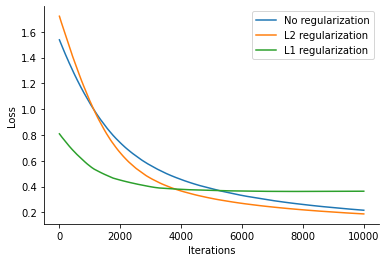

In [ ]:
nitr=10000
train_ls = np.zeros((nitr,3)) # Initializing a zeros matrix to store
                                              # the learning rate loss # List to store the loss for each instance

'''
regularization_list = ["No regularization: ", "L2 regularization: ", "L2 regularization: "] # Strings to be printed for organization
# Initializing a gradient descent instance to be used in each iteration
grad_desc_list = [GradDescent(max_iters=1e4, btch_sz=32, alpha=0, beta=0),
                  GradDescent(max_iters=1e4, btch_sz=32, alpha=0.01, beta=0),
                  GradDescent(max_iters=1e4, btch_sz=32, alpha=0, beta=0.1)]

for i in range(0,3):
    print(regularization_list[i])

    logrg = LogisticReg() # Initializing a Logistic Regression instance
    rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
    rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
    rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
    rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data

    logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc_list[0]) # Fitting the regression data
    probability, predictoutput = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it
    test_grd.append(logrg.temp_ls) # Storing the loss after every gradient descent instance is applied

    # Plotting the data in a classification report and noting the F1 and AUC scores
    print(classification_report(rg_dat.dum_y_test, predictoutput))
    print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
    print("AUC score: " + str(roc_auc_score(rg_dat.dum_y_test, probability, multi_class='ovr')))
    print()
'''
# Data for no regularization
print("No regularization: ")
logrg = LogisticReg() # Initializing a Logistic Regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc_noreg = GradDescent(max_iters=nitr, btch_sz=32, alpha=0, beta=0) # Initializing gradient descent
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc_noreg) # Fitting the regression data
probability_noreg, predictoutput_noreg = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it
auc_test_noreg = roc_auc_score(rg_dat.dum_y_test, probability_noreg)
train_ls[:, 0] = logrg.temp_ls

# Plotting the noreg data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput_noreg))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput_noreg))) #
print("AUC score: " + str(auc_test_noreg))
print()

# Data for L2 regularization
print("L2 regularization: ")
logrg = LogisticReg() # Initializing a Logistic Regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc_l2reg = GradDescent(max_iters=nitr, btch_sz=32, alpha=0.01, beta=0) # Initializing gradient descent
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc_l2reg) # Fitting the regression data
probability_l2reg, predictoutput_l2reg = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it
auc_test_l2reg = roc_auc_score(rg_dat.dum_y_test, probability_l2reg)
train_ls[:, 1] = logrg.temp_ls

# Plotting the l2reg data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput_l2reg))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput_l2reg))) #
print("AUC score: " + str(auc_test_l2reg))
print()

# Data for L1 regularization
print("L1 regularization: ")
logrg = LogisticReg() # Initializing a Logistic Regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc_l1reg = GradDescent(max_iters=nitr, btch_sz=32, alpha=0, beta=0.1) # Initializing gradient descent
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc_l1reg) # Fitting the regression data
probability_l1reg, predictoutput_l1reg = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it
auc_test_l1reg = roc_auc_score(rg_dat.dum_y_test, probability_l1reg)
train_ls[:, 2] = logrg.temp_ls

# Plotting the l1reg data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput_l1reg))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput_l1reg))) #
print("AUC score: " + str(auc_test_l1reg))
print()

fig, ax = plt.subplots()
plt.plot(train_ls)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
plt.legend(["No regularization", "L2 regularization", "L1 regularization"])

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        21
         1.0       0.93      0.97      0.95        29

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

F1 score: 0.9491525423728815
AUC score: 0.9770114942528736


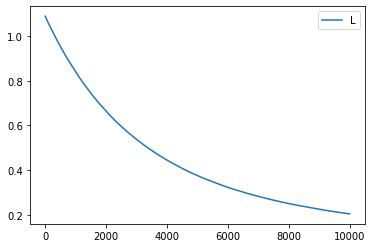

In [ ]:
logrg = LogisticReg() # Initializing a Logistic Regression instance

rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=100) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc = GradDescent(max_iters=1e4, btch_sz=32, alpha=0, beta=0) # Initializing gradient descent
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc) # Fitting the regression data
probability, predictoutput = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it

# Plotting the data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
print("AUC score: " + str(roc_auc_score(rg_dat.dum_y_test, probability, multi_class='ovr')))

plt.plot(logrg.temp_ls)
plt.legend("Loss",  loc=0)

## 2. L2 regularization

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        21
         1.0       0.93      0.93      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

F1 score: 0.9310344827586207
AUC score: 0.993431855500821


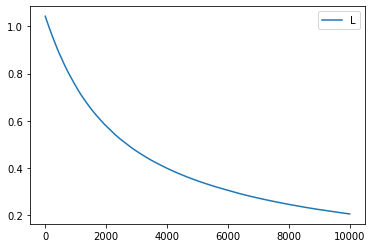

In [ ]:
logrg = LogisticReg() # Initializing a logistic regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc=GradDescent(max_iters=1e4,alpha=0.01, beta=0) # Initializing gradient descent,
                                                        # this time with L2 regularization
                                                        # in the alpha value
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data
probability, predictoutput = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it

# Plotting the data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
print("AUC score: " + str(roc_auc_score(rg_dat.dum_y_test, probability, multi_class='ovr')))

plt.plot(logrg.temp_ls)
plt.legend("Loss")

## 3. L1 regularization

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

F1 score: 0.9824561403508771
AUC score: 0.9950738916256158


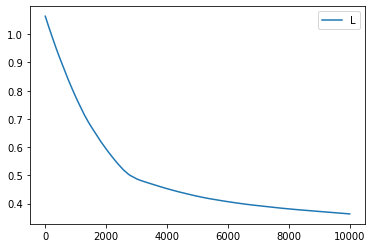

In [ ]:
logrg = LogisticReg() # Initializing a logistic regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc=GradDescent(max_iters=1e4,alpha=0, beta=0.1) # Initializing gradient descent,
                                                       # this time with L1 regularization
                                                       # in the beta value
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data
probability, predictoutput = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it

# Plotting the data in a classification report and noting the F1 and AUC scores
print(classification_report(rg_dat.dum_y_test, predictoutput))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
print("AUC score: " + str(roc_auc_score(rg_dat.dum_y_test, probability, multi_class='ovr')))

plt.plot(logrg.temp_ls)
plt.legend("Loss")

## 4. Investigate feature importance via L1 regularization

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        21
         1.0       0.90      0.90      0.90        29

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

F1 score: 0.896551724137931
AUC score: 0.9852216748768473
[[ 1.13555102e-05]
 [ 1.21057042e-04]
 [ 5.66048836e-05]
 [ 1.16237996e-04]
 [-1.38893371e+00]
 [ 4.49540791e-01]
 [-1.29259004e-01]
 [ 1.70276326e-01]
 [-6.57535727e-01]
 [ 2.23248504e-04]
 [-3.18581988e-05]
 [-9.26553453e-06]]


Text(0, 0.5, 'Weight')

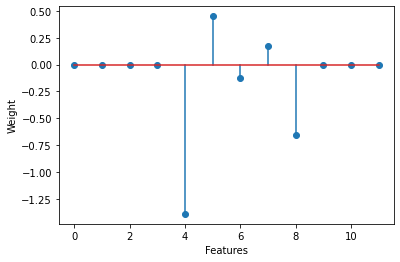

In [ ]:
logrg = LogisticReg() # Initializing a logistic regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.2, rnd_stat=120) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc=GradDescent(max_iters=1e4,alpha=0, beta=0.1) # Initializing gradient descent,
                                                       # again with L1 regularization
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data
probability, predictoutput = logrg.predict(rg_dat.dum_x_test) # Predicting the output and storing it

# Plotting the data in a classification report and noting the F1 and AUC scores, along with subplots
# to note features
print(classification_report(rg_dat.dum_y_test, predictoutput))
print("F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
print("AUC score: " + str(roc_auc_score(rg_dat.dum_y_test, probability, multi_class='ovr')))

print(logrg.w[:-1])

fig, ax = plt.subplots()
plt.stem(logrg.w[:-1])
plt.xlabel('Features')
plt.ylabel('Weight')

## 5. Use different training sizes and see model performances

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89        86
         1.0       0.99      0.82      0.90       114

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.89       200
weighted avg       0.91      0.90      0.90       200

Test F1 score: 0.8995215311004785
Train F1 score: 0.8679245283018867
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91        75
         1.0       0.99      0.86      0.92       100

    accuracy                           0.91       175
   macro avg       0.91      0.92      0.91       175
weighted avg       0.93      0.91      0.91       175

Test F1 score: 0.9197860962566845
Train F1 score: 0.963855421686747
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        64
         1.0 

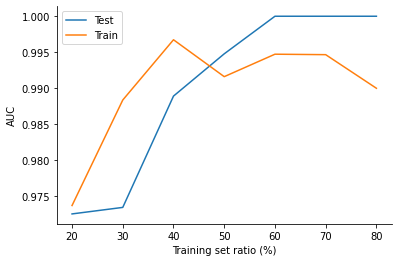

In [ ]:
trn_pool = np.arange(2,9) * 10 # List of different training sizes

train_grd=[]
test_grd=[]

for sz in trn_pool:
    tst_ratio = (100-sz)/100 # Picking an appropriate test ratio according to size

    logrg = LogisticReg() # Initializing a logistic regression instance
    rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
    rg_dat.split(tst_ratio=tst_ratio, rnd_stat=100) # Splitting the data into test and train sets
    rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
    rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
    grad_desc=GradDescent(max_iters=1e4,alpha=0, beta=0) # Initializing gradient descent
    logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data
    probability, predictoutput = logrg.predict(rg_dat.dum_x_test)  # Predicting the output from
                                                                   # test values and storing it
    probability_train, predictoutput_train = logrg.predict(rg_dat.dum_x_train)   # Predicting the output
                                                                   # from train values and storing it
    
    # Plotting the data in a classification report and noting the test and train F1 scores
    print(classification_report(rg_dat.dum_y_test, predictoutput))
    print("Test F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
    print("Train F1 score: " + str(f1_score(rg_dat.dum_y_train, predictoutput_train)))

    # Saving the AUC score data for the test and train sets for each training size
    auc_test_y= roc_auc_score(rg_dat.dum_y_test, probability)
    test_grd.append(auc_test_y)
    auc_train_y= roc_auc_score(rg_dat.dum_y_train, probability_train)
    train_grd.append(auc_train_y)

# Now plotting the AUC scores for the test and train values
fig, ax = plt.subplots()
plt.plot(test_grd)
plt.plot(train_grd)
ax.set_xticks(np.arange(0,len(trn_pool)))
ax.set_xticklabels(trn_pool) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('AUC')
ax.set_xlabel('Training set ratio (%)')
plt.legend(["Test", "Train"])

##6. Use different batch sizes and see model performance


Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        23
         1.0       1.00      0.80      0.89        30

    accuracy                           0.89        53
   macro avg       0.90      0.90      0.89        53
weighted avg       0.91      0.89      0.89        53

Test F1 score: 0.888888888888889
Train F1 score: 0.9537037037037037
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        23
         1.0       0.97      0.93      0.95        30

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53

Test F1 score: 0.9491525423728815
Train F1 score: 0.9333333333333333
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0 

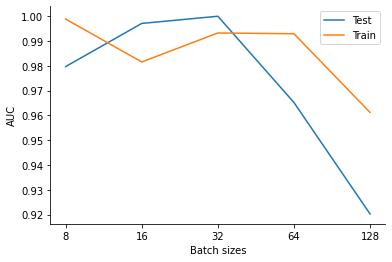

In [ ]:
btch_pool = 2**np.arange(3,8) # Initializing a list of batch sizes of powers of 2 from 8 to 128

train_grd=[]
test_grd=[]
ls_test_grd=[]
ls_train_grd=
# Using a different batch size in the batch pool for each iteration
for sz in btch_pool:
    logrg = LogisticReg()  # Initializing a logistic regression instance
    rg_dat = LogRegData(pth)  # Getting the logistic regression data from the file path
    rg_dat.split(tst_ratio=0.21, rnd_stat=100)  # Splitting the data into test and train sets
    rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
    rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
    grad_desc=GradDescent(max_iters=1e4,btch_sz=sz, alpha=0, beta=0) # Initializing gradient descent
    logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data
    probability, predictoutput = logrg.predict(rg_dat.dum_x_test)  # Predicting the output from
                                                                   # test values and storing it
    probability_train, predictoutput_train = logrg.predict(rg_dat.dum_x_train)   # Predicting the output
                                                                   # from train values and storing it

    # Plotting the data in a classification report and noting the test and train F1 scores
    print(classification_report(rg_dat.dum_y_test, predictoutput))
    print("Test F1 score: " + str(f1_score(rg_dat.dum_y_test, predictoutput)))
    print("Train F1 score: " + str(f1_score(rg_dat.dum_y_train, predictoutput_train)))

    # Saving the AUC score data for the test and train sets for each training size
    auc_test_y= roc_auc_score(rg_dat.dum_y_test, probability)
    test_grd.append(auc_test_y)
    ls.grd.append()
    auc_train_y= roc_auc_score(rg_dat.dum_y_train, probability_train)
    train_grd.append(auc_train_y)

# Now plotting the AUC scores for the test and train values
fig, ax = plt.subplots()
plt.plot(test_grd)
plt.plot(train_grd)
ax.set_xticks(np.arange(0,len(btch_pool)))
ax.set_xticklabels(btch_pool) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('AUC')
ax.set_xlabel('Batch sizes')
plt.legend(["Test", "Train"])


fig, ax = plt.subplots()
plt.plot(test_grd)
plt.plot(train_grd)
ax.set_xticks(np.arange(0,len(btch_pool)))
ax.set_xticklabels(btch_pool) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('AUC')
ax.set_xlabel('Batch sizes')
plt.legend(["Test", "Train"])

##7. Use different learning rates and see model performance

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.

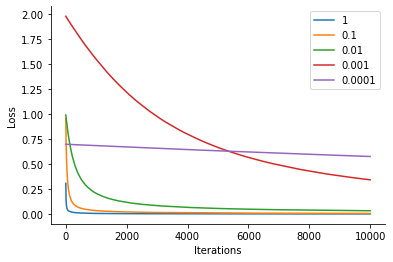

In [ ]:
lrn_pool = np.array([1, 0.1, 0.01, 0.001, 0.0001]) # Array of different learning rates

train_grd=[]
test_grd=[]

nitr=10000 # Number of iterations
rate_results = np.zeros((nitr,lrn_pool.size)) # Initializing a zeros matrix to store
                                              # the learning rate loss

for i in range(0, lrn_pool.size):
    logrg = LogisticReg() # Initializing a logistic regression instance
    rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
    rg_dat.split(tst_ratio=0.20, rnd_stat=100) # Splitting the data into test and train sets
    rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
    rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
    grad_desc=GradDescent(learning_rate=lrn_pool[i], max_iters=nitr, alpha=0, beta=0)
                                                              # Initializing gradient descent
                                                              # with the learning rate corresponding
                                                              # to an element in lrn_pool
    logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc) # Fitting the regression data

    rate_results[:, i] = logrg.temp_ls # Adding the loss of this iteration to the results matrix

    probability, predictoutput = logrg.predict(rg_dat.dum_x_test)  # Predicting the output from
                                                                   # test values and storing it
    probability_train, predictoutput_train = logrg.predict(rg_dat.dum_x_train)   # Predicting the output
                                                                   # from train values and storing it
    
    # Plotting the data in a classification report
    print(classification_report(rg_dat.dum_y_test, predictoutput))

fig, ax = plt.subplots()
a=plt.plot(rate_results)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.legend(a, ["1","0.1","0.01","0.001", "0.0001"])

## 8. Use momentum and see model performance

Iteration: 0
Iteration: 5000
Iteration: 0
Iteration: 5000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



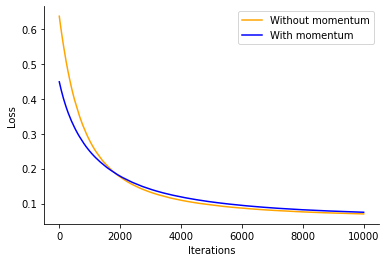

In [ ]:
train_grd=[]
test_grd=[]

nitr=10000 # Number of iterations

# Initializing data lists for the loss without momentum and with momentum
without_momntm = np.zeros((nitr,1))
with_momntm = np.zeros((nitr,1))

logrg = LogisticReg() # Initializing a logistic regression instance
rg_dat = LogRegData(pth) # Getting the logistic regression data from the file path
rg_dat.split(tst_ratio=0.20, rnd_stat=100) # Splitting the data into test and train sets
rg_dat.dum_coder(rg_dat.x_train, rg_dat.x_test) # One hot encoding the x data
rg_dat.dum_coder(rg_dat.y_train, rg_dat.y_test, cat_dat=[0]) # One hot encoding the y data
grad_desc=GradDescent(learning_rate=0.005, max_iters=nitr, alpha=0.01, beta=0, mn_beta=0)
                                                        # Initializing gradient descent without momentum
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train, grad_desc, momentum=momntm) # Fitting the regression data
without_momntm[:, 0] = logrg.temp_ls # Storing the loss without momentum

grad_desc=GradDescent(learning_rate=0.005, max_iters=nitr, alpha=0.01, beta=0, mn_beta=0.9)
                                                    # Initializing gradient descent with momentum of beta 0.9
logrg.fit(rg_dat.dum_x_train, rg_dat.dum_y_train,grad_desc, momentum=momntm) # Fitting the regression data
with_momntm[:, 0] = logrg.temp_ls # Storing the loss with momentum


probability, predictoutput = logrg.predict(rg_dat.dum_x_test)  # Predicting the output from
                                                               # test values and storing it
probability_train, predictoutput_train = logrg.predict(rg_dat.dum_x_train)  # Predicting the output
                                                                   # from train values and storing it

# Plotting the data in a classification report
print(classification_report(rg_dat.dum_y_test, predictoutput))
    
fig, ax = plt.subplots()
plt.plot(without_momntm,color="orange")
plt.plot(with_momntm,color="blue")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
plt.legend(["Without momentum", "With momentum"])

In [ ]:
print(rate_results)

[[0.69297997]
 [0.69276571]
 [0.69255656]
 ...
 [0.18631412]
 [0.18630225]
 [0.18629071]]
